In [1]:
import os
import sys
import numpy as np

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lyubishchev.cli import last
from lyubishchev.report import get_highlights
from time_report_notebook import draw_bars_chart, draw_bars_effective_output, show_effective_output_highlights
from time_report_notebook import show_time_stat_as_piechart
from time_report_notebook import draw_wakeup_plot, draw_bed_plot

from icecream import ic
ic.disable()

report = last(5)
time_interval_metrics = report.get_interval_metrics()

high_lights = get_highlights(report)

ic(high_lights)

{'self_improving': 'Total time: 4.18h, daily average: 0.84h',
 'work': 'Total time: 9.68h, daily average: 3.23h',
 'effective_output': 'Total time: 13.87h, daily average: 2.77h',
 'sex': 'day has sex: 2/5, happens every 2.5 days. total hour/every time avg 1.25/0.62h',
 'sleep': 'average nap 0.24h, day has nap 2/5, happens every 2.5 days. average nightly sleep 8.52h, average all sleep time 8.76h',
 'meditation': 'daily meditation: 0.02h days with meditation: 1/5, happends every 5.0 days',
 'exercise': 'daily exercise: 0.15h, days with exercise: 1/5, happens every 5.0 days'}

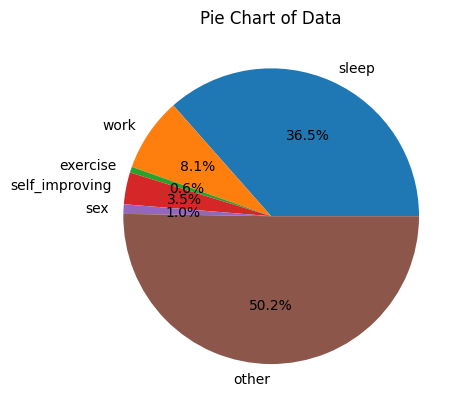

In [2]:
show_time_stat_as_piechart(report.get_time_stats())

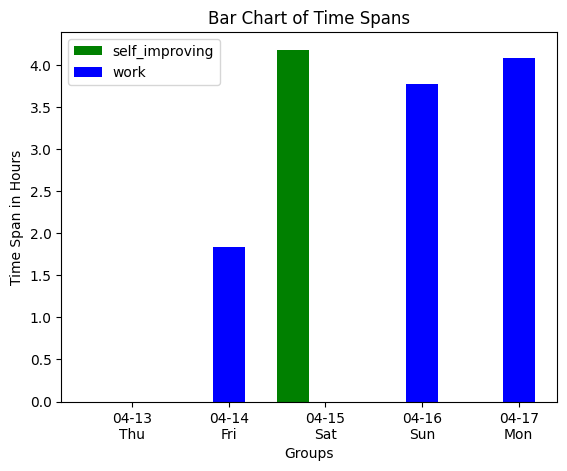

effective_output:		 Total time: 13.87h, daily average: 2.77h
self_improving:			 Total time: 4.18h, daily average: 0.84h
work:				 Total time: 9.68h, daily average: 3.23h


In [3]:
# effective output
draw_bars_effective_output(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    self_improving_minutes=time_interval_metrics["effective_output"]["self_improving"],
    work_minutes=time_interval_metrics["effective_output"]["work"],
)
show_effective_output_highlights(high_lights)

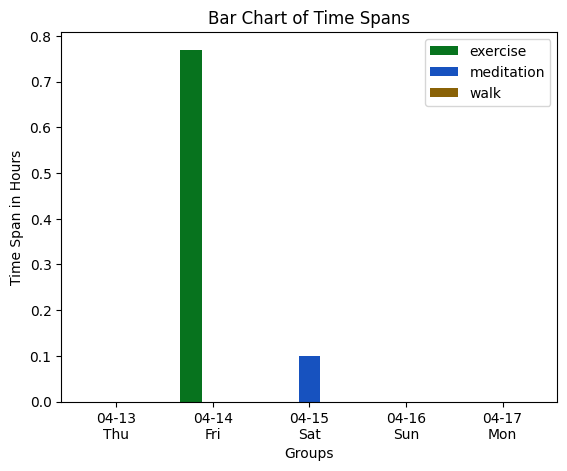

In [4]:
# self calm
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "exercise": {
            "color": "#07731e",
            "time_span_minutes": time_interval_metrics["exercise"],
        },
        "meditation": {
            "color": "#1752bf",
            "time_span_minutes": time_interval_metrics["meditation"],
        },
        "walk": {
            "color": "#8a6207",
            "time_span_minutes": time_interval_metrics["walk"],
        },
    }
)

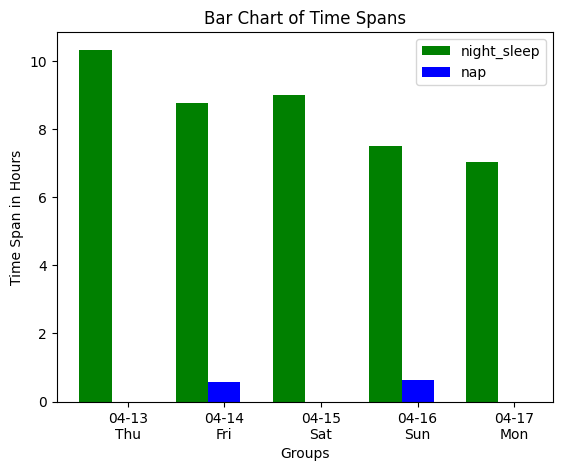

In [5]:
# sleep
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "night_sleep": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["sleep"]["night_sleep"],
        },
        "nap": {
            "color": "blue",
            "time_span_minutes": time_interval_metrics["sleep"]["nap"],
        },
    }
)

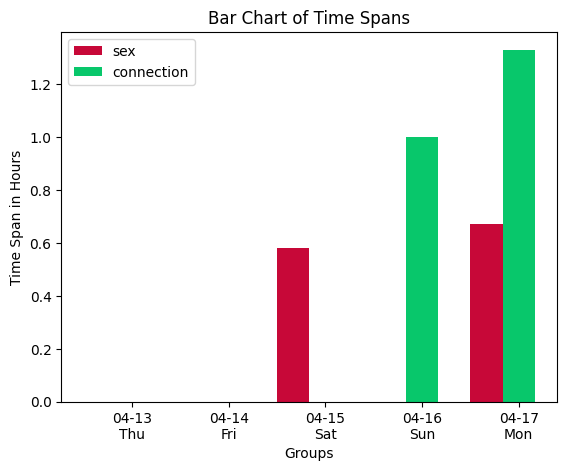

In [6]:
# human connection: sex, connection, joyful
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "sex": {
            "color": "#c70838",
            "time_span_minutes": time_interval_metrics["sex"],
        },
        "connection": {
            "color": "#08c76b",
            "time_span_minutes": time_interval_metrics["connection"],
        }
    }
)

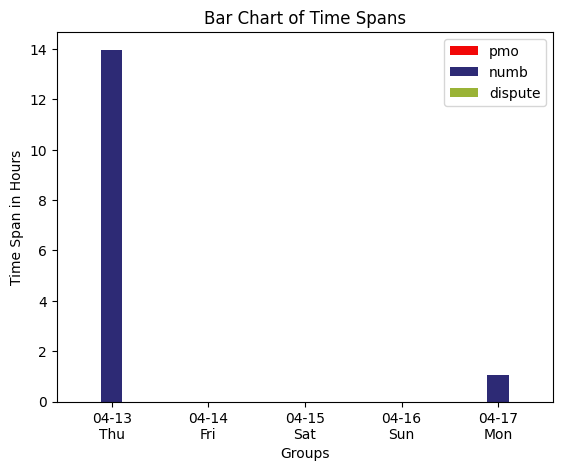

In [7]:
# time I regret spent: numb, dispute, pmo
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "pmo": {
            "color": "#f20707",
            "time_span_minutes": time_interval_metrics["pmo"],
        },
        "numb": {
            "color": "#2d2a75",
            "time_span_minutes": time_interval_metrics["numb"],
        },
        "dispute": {
            "color": "#9ab336",
            "time_span_minutes": time_interval_metrics["dispute"],
        },
    }
)

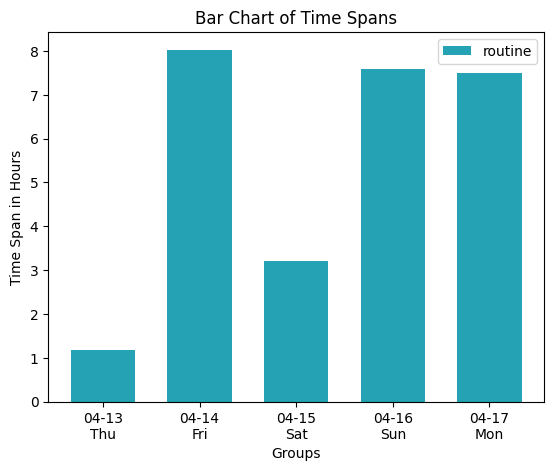

In [8]:
# Time for routine
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "routine": {
            "color": "#25a2b3",
            "time_span_minutes": time_interval_metrics["routine"],
        },
    }
)

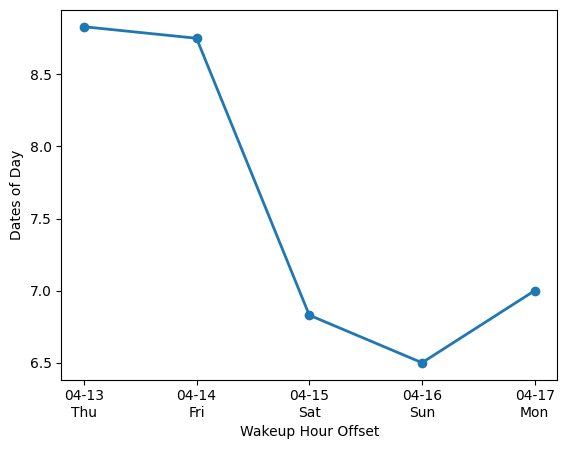

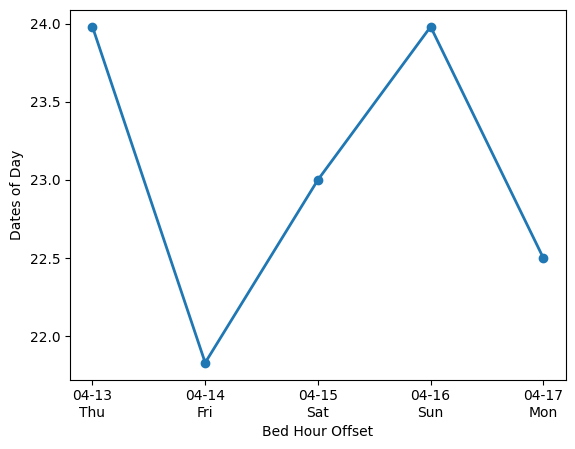

In [9]:
draw_wakeup_plot(
    wakeup_timestamps=report.get_event_metrics()["wakeup"],
    dates=report.dates(),
)
draw_bed_plot(
    bed_timestamps=report.get_event_metrics()["bed"],
    dates=report.dates(),
)